logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_targetsamples.txt


100%|██████████| 94/94 [00:00<00:00, 368127.52it/s]


logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_targetsamples.txt


100%|██████████| 47/47 [00:00<00:00, 328007.13it/s]


logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_targetsamples.txt


100%|██████████| 31/31 [00:00<00:00, 339486.75it/s]


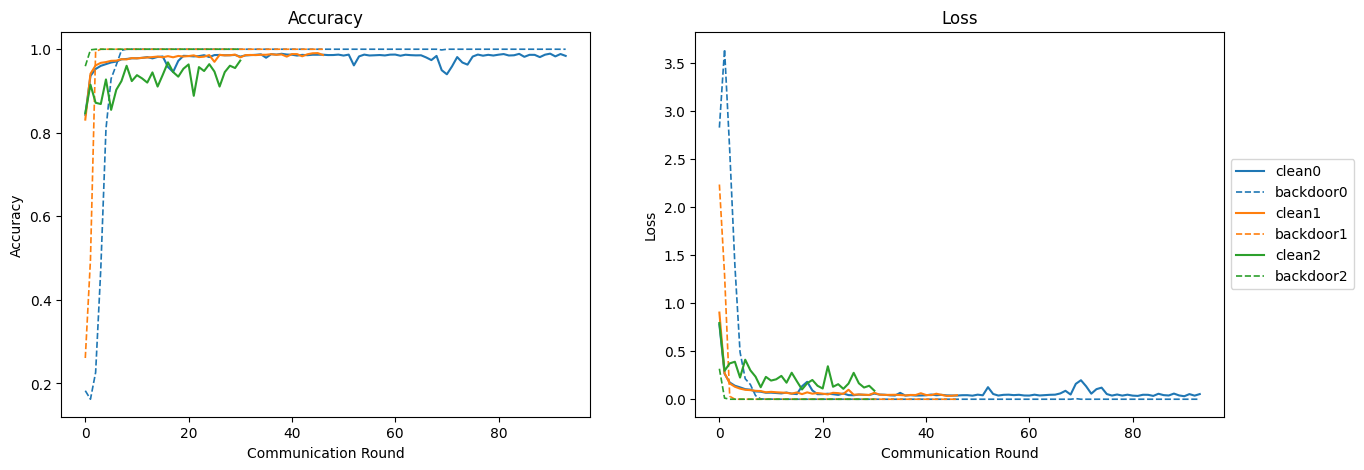

In [18]:
import re
from tqdm import tqdm

# Define the regex pattern
pattern = r"Loss: clean ([0-9.]+) poison ([0-9.]+), Accuracy: clean ([0-9.]+) poison ([0-9.]+)"

# list_text_file = [("logs_all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.png"),
#                   ("logs_all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.png")]

list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_targetsamples.txt", "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_targetsamples.txt", 
                  "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_targetsamples.txt"]

record = [{"clean_loss": [],
        "backdoor_loss": [],
        "clean_accuracy": [],
        "backdoor_accuracy": []} for i in range(len(list_text_file))]


# Load text files and read them in lines. After that put into a list of dictionaries, each dictionary corresponds to a text file.
for text_file in list_text_file:
    print(text_file)
    with open(text_file, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if "Test set:" in line]
    for line in tqdm(lines):

        # Use the regex pattern to find matches in the text
        matches = re.search(pattern, line)

        if matches:
            clean_loss = float(matches.group(1))
            poison_loss = float(matches.group(2))
            clean_accuracy = float(matches.group(3))
            poison_accuracy = float(matches.group(4))

            # Add the results to the dictionary record

            record[list_text_file.index(text_file)]["clean_loss"].append(clean_loss)
            record[list_text_file.index(text_file)]["backdoor_loss"].append(poison_loss)
            record[list_text_file.index(text_file)]["clean_accuracy"].append(clean_accuracy)
            record[list_text_file.index(text_file)]["backdoor_accuracy"].append(poison_accuracy)

        else:
            print("No match found.")



# plot multiple graphs into a single figure. Each graph corresponds to a text file
# Display the y axis range from 0 to 1, x axis range from 0 to 100
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for i in range(len(list_text_file)):
    ax1.plot(record[i]["clean_accuracy"], label="clean" + str(i), linewidth=1.5)
    # Apply the same color of clean_accuracy to backdoor_accuracy. Backdoor accuracy is a dash line. Make the line bold.
    ax1.plot(record[i]["backdoor_accuracy"], label="backdoor" + str(i), color=ax1.lines[-1].get_color(), linestyle="--", linewidth=1.2)
    # ax1.plot(record[i]["backdoor_accuracy"], label="backdoor" + str(i))
    ax1.set_title("Accuracy")
    ax1.set_xlabel("Communication Round")
    ax1.set_ylabel("Accuracy")
    # ax1.set_xlim([0, 100])
    # ax1.set_ylim([0, 1])
    # Make the legend above the plot
    # ax1.legend(loc='center', bbox_to_anchor=(1, 0.5))
    # ax1.legend()

    ax2.plot(record[i]["clean_loss"], label="clean" + str(i), linewidth=1.5)
    ax2.plot(record[i]["backdoor_loss"], label="backdoor" + str(i), color=ax2.lines[-1].get_color(), linestyle="--", linewidth=1.2)
    ax2.set_title("Loss")
    ax2.set_xlabel("Communication Round")
    ax2.set_ylabel("Loss")
    # ax2.set_xlim([0, 100])
    # Set y axis range starts from 0 and it doesn't have a upper limit
    # ax2.set_ylim([0, None])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # ax2.legend()
plt.show()




In [19]:
# save the figure to a file
save_path = "all2all_poisonepochs5_unet__poisonepochstop100_adversaries1to3_targetsamples.png"
fig.savefig(save_path)

In [4]:
import os

os.getcwd()

'/ssd_data/Son/LRBA'

logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_targetsamples.txt


100%|██████████| 100/100 [00:00<00:00, 354248.65it/s]


logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_targetsamples.txt


100%|██████████| 100/100 [00:00<00:00, 402524.38it/s]


logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_targetsamples.txt


100%|██████████| 100/100 [00:00<00:00, 396812.11it/s]


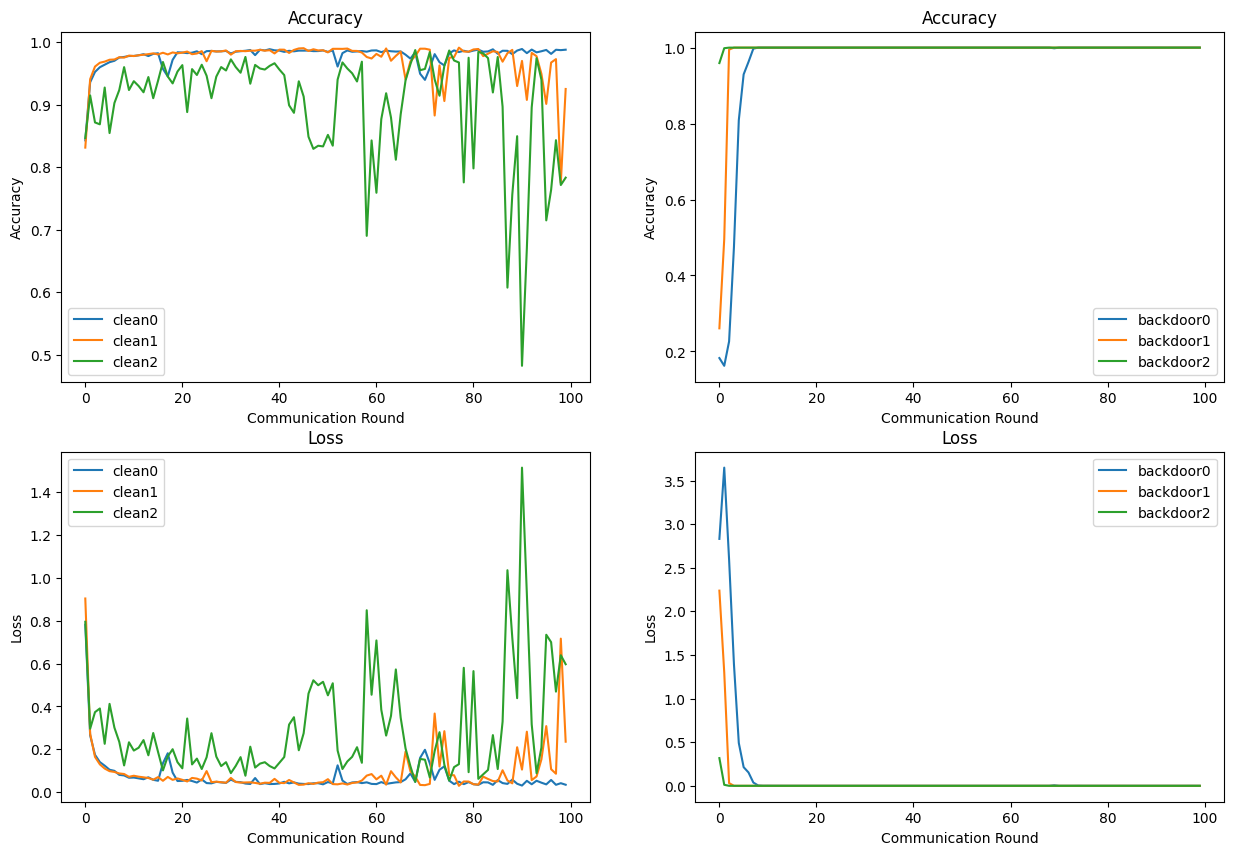

In [2]:
import re
from tqdm import tqdm

# Define the regex pattern
pattern = r"Loss: clean ([0-9.]+) poison ([0-9.]+), Accuracy: clean ([0-9.]+) poison ([0-9.]+)"

# list_text_file = [("logs_all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.png"),
#                   ("logs_all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.png")]

list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_targetsamples.txt",
                  "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_targetsamples.txt",
                  "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_targetsamples.txt",
                  ]

record = [{"clean_loss": [],
        "backdoor_loss": [],
        "clean_accuracy": [],
        "backdoor_accuracy": []} for i in range(len(list_text_file))]


# Load text files and read them in lines. After that put into a list of dictionaries, each dictionary corresponds to a text file.
for text_file in list_text_file:
    print(text_file)
    with open(text_file, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if "Test set:" in line]
    for line in tqdm(lines):

        # Use the regex pattern to find matches in the text
        matches = re.search(pattern, line)

        if matches:
            clean_loss = float(matches.group(1))
            poison_loss = float(matches.group(2))
            clean_accuracy = float(matches.group(3))
            poison_accuracy = float(matches.group(4))

            # Add the results to the dictionary record

            record[list_text_file.index(text_file)]["clean_loss"].append(clean_loss)
            record[list_text_file.index(text_file)]["backdoor_loss"].append(poison_loss)
            record[list_text_file.index(text_file)]["clean_accuracy"].append(clean_accuracy)
            record[list_text_file.index(text_file)]["backdoor_accuracy"].append(poison_accuracy)

        else:
            print("No match found.")

# plot clean accuracy, backdoor accuracy, clean loss, backdoor loss into subplots(2,2)
# Display the y axis range from 0 to 1, x axis range from 0 to 100
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

for i in range(len(list_text_file)):
    ax1.plot(record[i]["clean_accuracy"], label="clean" + str(i), linewidth=1.5)
    ax1.set_title("Accuracy")
    ax1.set_xlabel("Communication Round")
    ax1.set_ylabel("Accuracy")
    ax1.legend()
    # Apply the same color of clean_accuracy to backdoor_accuracy. Backdoor accuracy is a dash line. Make the line bold.
    ax2.plot(record[i]["backdoor_accuracy"], label="backdoor" + str(i), color=ax1.lines[-1].get_color(), linewidth=1.5)
    # ax1.plot(record[i]["backdoor_accuracy"], label="backdoor" + str(i))
    ax2.set_title("Accuracy")
    ax2.set_xlabel("Communication Round")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    # ax1.set_xlim([0, 100])
    # ax1.set_ylim([0, 1])
    # Make the legend above the plot
    # ax1.legend(loc='center', bbox_to_anchor=(1, 0.5))
    # ax1.legend()

    ax3.plot(record[i]["clean_loss"], label="clean" + str(i), linewidth=1.5)
    ax3.set_title("Loss")
    ax3.set_xlabel("Communication Round")
    ax3.set_ylabel("Loss")
    ax3.legend()

    ax4.plot(record[i]["backdoor_loss"], label="backdoor" + str(i), color=ax3.lines[-1].get_color(), linewidth=1.5)
    ax4.set_title("Loss")
    ax4.set_xlabel("Communication Round")
    ax4.set_ylabel("Loss")
    ax4.legend()
    # ax2.set_xlim([0, 100])
    # Set y axis range starts from 0 and it doesn't have a upper limit
    # ax2.set_ylim([0, None])
    # ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # ax2.legend()









logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid.txt


100%|██████████| 100/100 [00:00<00:00, 182361.04it/s]


logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_deepsight.txt


100%|██████████| 100/100 [00:00<00:00, 181571.60it/s]


logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_flame.txt


100%|██████████| 100/100 [00:00<00:00, 195083.91it/s]


logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_fldetector.txt


100%|██████████| 52/52 [00:00<00:00, 114912.44it/s]


logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_foolsgold.txt


100%|██████████| 100/100 [00:00<00:00, 173533.47it/s]


logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_rflbat.txt


100%|██████████| 100/100 [00:00<00:00, 189530.23it/s]


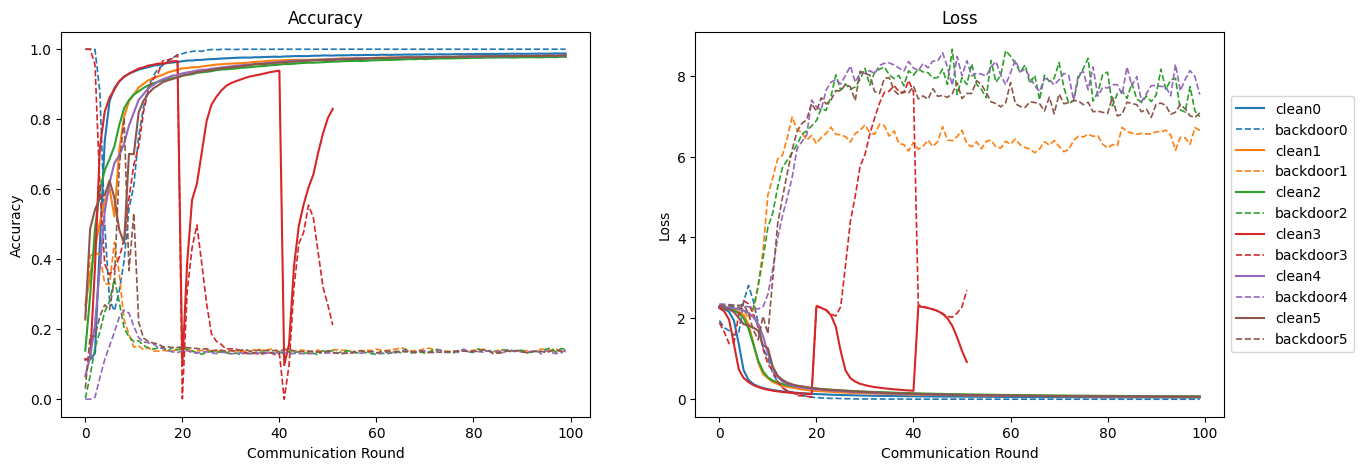

In [ ]:
import re
from tqdm import tqdm

# Define the regex pattern
pattern = r"Loss: clean ([0-9.]+) poison ([0-9.]+), Accuracy: clean ([0-9.]+) poison ([0-9.]+)"

# list_text_file = [("logs_all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.png"),
#                   ("logs_all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.png")]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_dirichletalpha0.9_simplenet.txt", "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_deepsight.txt", 
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_flame.txt", "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_fldetector.txt",
                  
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_foolsgold.txt", "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_rflbat.txt"
#                   ]

list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid.txt", "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_deepsight.txt", 
                  "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_flame.txt", "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_fldetector.txt",
                  
                  "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_foolsgold.txt", "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_iid_rflbat.txt"
                  ]

record = [{"clean_loss": [],
        "backdoor_loss": [],
        "clean_accuracy": [],
        "backdoor_accuracy": []} for i in range(len(list_text_file))]


# Load text files and read them in lines. After that put into a list of dictionaries, each dictionary corresponds to a text file.
for text_file in list_text_file:
    print(text_file)
    with open(text_file, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if "Test set:" in line]
    for line in tqdm(lines):

        # Use the regex pattern to find matches in the text
        matches = re.search(pattern, line)

        if matches:
            clean_loss = float(matches.group(1))
            poison_loss = float(matches.group(2))
            clean_accuracy = float(matches.group(3))
            poison_accuracy = float(matches.group(4))

            # Add the results to the dictionary record

            record[list_text_file.index(text_file)]["clean_loss"].append(clean_loss)
            record[list_text_file.index(text_file)]["backdoor_loss"].append(poison_loss)
            record[list_text_file.index(text_file)]["clean_accuracy"].append(clean_accuracy)
            record[list_text_file.index(text_file)]["backdoor_accuracy"].append(poison_accuracy)

        else:
            print("No match found.")



# plot multiple graphs into a single figure. Each graph corresponds to a text file
# Display the y axis range from 0 to 1, x axis range from 0 to 100
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for i in range(len(list_text_file)):
    ax1.plot(record[i]["clean_accuracy"], label="clean" + str(i), linewidth=1.5)
    # Apply the same color of clean_accuracy to backdoor_accuracy. Backdoor accuracy is a dash line. Make the line bold.
    ax1.plot(record[i]["backdoor_accuracy"], label="backdoor" + str(i), color=ax1.lines[-1].get_color(), linestyle="--", linewidth=1.2)
    # ax1.plot(record[i]["backdoor_accuracy"], label="backdoor" + str(i))
    ax1.set_title("Accuracy")
    ax1.set_xlabel("Communication Round")
    ax1.set_ylabel("Accuracy")
    # ax1.set_xlim([0, 100])
    # ax1.set_ylim([0, 1])
    # Make the legend outside of the line graph
    
    # ax1.legend()

    ax2.plot(record[i]["clean_loss"], label="clean" + str(i), linewidth=1.5)
    ax2.plot(record[i]["backdoor_loss"], label="backdoor" + str(i), color=ax2.lines[-1].get_color(), linestyle="--", linewidth=1.2)
    ax2.set_title("Loss")
    ax2.set_xlabel("Communication Round")
    ax2.set_ylabel("Loss")
    # ax2.set_xlim([0, 100])
    # Set y axis range starts from 0 and it doesn't have a upper limit
    # ax2.set_ylim([0, None])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # ax2.legend()
plt.show()




In [ ]:
# save the figure to a file
save_path = "all2one_poisonepochs5_unet_adversaries4over10_alpha0.5_attackportion5_10_20.png"
fig.savefig(save_path)

In [ ]:
import os

os.getcwd()

'/vinserver_user/son.nh/LRBA'

experiments/exp43/12.11_16.57.33/logs.txt


100%|██████████| 1500/1500 [00:00<00:00, 579804.26it/s]


experiments/exp44/12.11_17.05.10/logs.txt


100%|██████████| 1500/1500 [00:00<00:00, 590192.87it/s]


experiments/exp46/12.11_17.05.38/logs.txt


100%|██████████| 1500/1500 [00:00<00:00, 579217.09it/s]

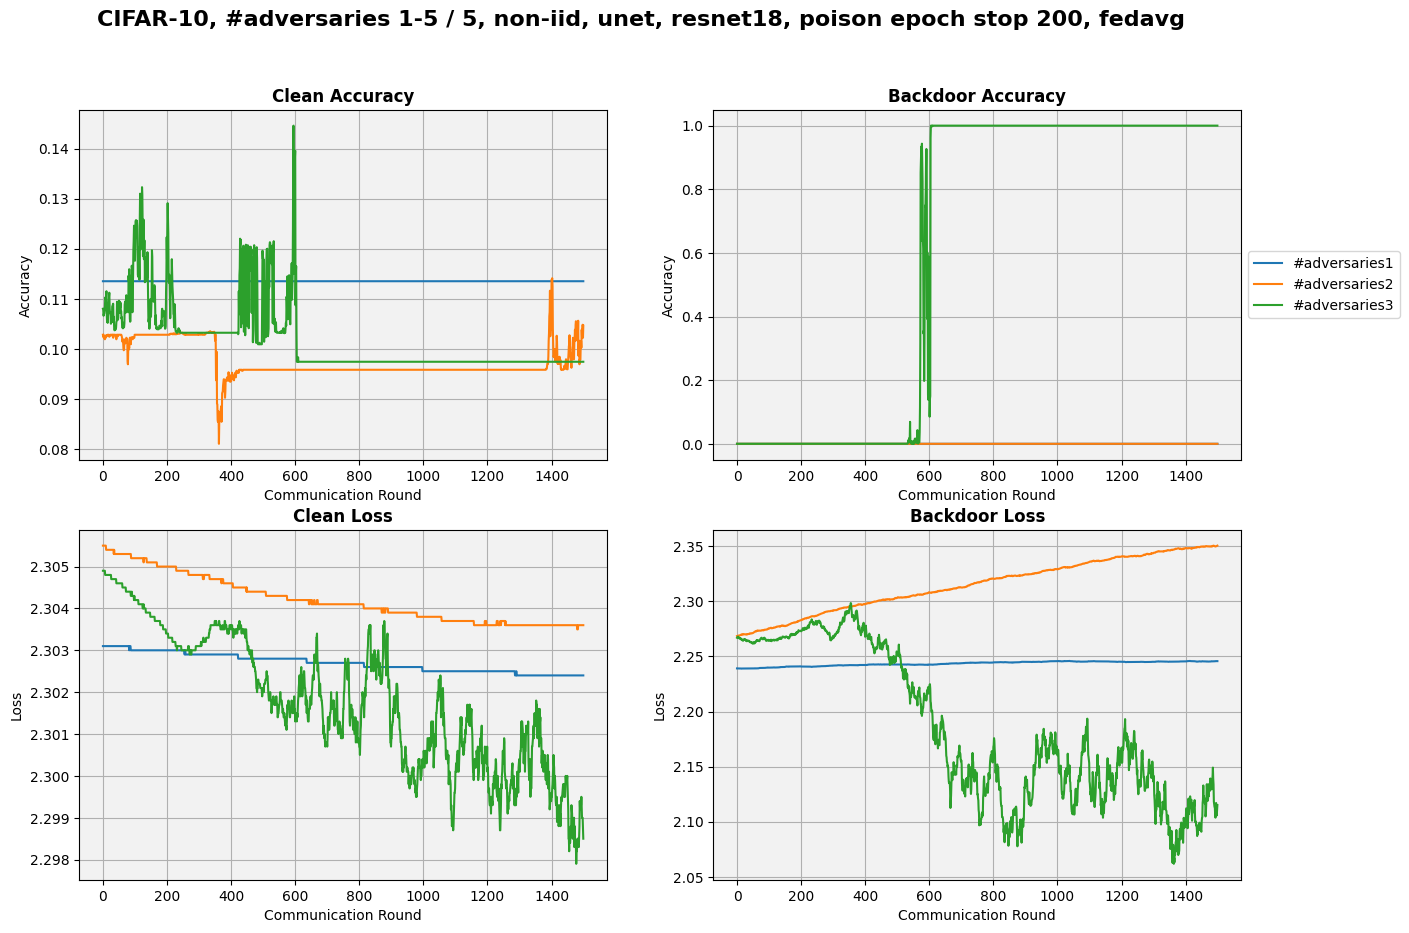

In [1]:
import re
from tqdm import tqdm

# Define the regex pattern
pattern = r"Loss: clean ([0-9.]+) poison ([0-9.]+), Accuracy: clean ([0-9.]+) poison ([0-9.]+)"

# list_text_file = [("logs_all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.png"),
#                   ("logs_all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.png")]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_deepsight.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_flame.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_fldetector.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_foolsgold.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_rflbat.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_deepsight.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_flame.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_fldetector.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_foolsgold.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_rflbat.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_deepsight.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_flame.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_fldetector.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_foolsgold.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_rflbat.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt"
                  
#                   ]

# list_text_file = ["experiments/exp1/Oct.26_06.19.26/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp1/Oct.26_06.19.45/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp1/Oct.26_06.19.58/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp1/Oct.26_06.20.09/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp1/Oct.26_06.20.18/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   ]

# list_text_file = ["experiments/exp3/Oct.26_07.07.31/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp3/Oct.26_07.08.08/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp3/Oct.26_07.08.28/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp3/Oct.26_07.08.51/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp3/Oct.26_07.09.17/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "experiments/exp2/Oct.26_06.59.41/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg_verified.txt",
#                   "experiments/exp2/Oct.26_07.01.50/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg_verified.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_deepsight.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_flame.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_fldetector.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_foolsgold.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_rflbat.txt"
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_noniid.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_noniid.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_noniid.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_noniid.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_noniid.txt"
#                   ]

# list_text_file = ["experiments/exp4/Oct.29_06.39.05/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp4/Oct.29_06.42.28/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp4/Oct.29_06.43.26/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp4/Oct.29_06.43.51/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp4/Oct.29_06.44.16/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp5/Oct.29_14.36.01/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp5/Oct.29_14.36.29/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp5/Oct.29_14.37.02/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp5/Oct.29_14.37.17/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp5/Oct.29_14.37.33/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp6/Oct.30_03.30.38/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp6/Oct.30_03.31.22/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp6/Oct.30_03.31.38/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp6/Oct.30_03.32.35/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp6/Oct.30_03.33.07/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp7/Oct.30_06.34.22/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.1_fedavg.txt",
#                   "experiments/exp8/Oct.30_07.14.01/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.01_fedavg.txt",
#                   "experiments/exp9/Oct.30_09.26.32/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.1_adam_fedavg.txt",
#                   "experiments/exp10/Oct.30_09.33.35/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.1_adam_fedavg.txt",
#                   "experiments/exp11/Oct.31_03.40.14/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.1_adam_fedavg.txt",
#                   "experiments/exp12/Oct.31_06.36.35/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.01_adam_fedavg.txt",
#                   "experiments/exp13/Oct.31_07.08.05/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.01_adam_fedavg.txt"
#                   ]

list_text_file = ["experiments/exp12/Oct.31_08.36.33/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp12/Oct.31_08.37.01/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp12/Oct.31_08.37.22/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp12/Oct.31_08.38.03/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp12/Oct.31_08.38.31/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  ]

# list_text_file = ["experiments/exp17/Oct.31_16.34.23/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp17/Oct.31_16.34.38/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp17/Oct.31_16.35.03/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp17/Oct.31_16.35.24/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp17/Oct.31_16.35.43/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"]

list_text_file = ["experiments/exp18/Oct.31_16.45.31/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
                  "experiments/exp18/Oct.31_16.46.01/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
                  "experiments/exp18/Oct.31_16.46.18/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
                  "experiments/exp18/Oct.31_16.46.43/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
                  "experiments/exp18/Oct.31_16.48.35/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt"]

# list_text_file = ["experiments/exp15/Oct.31_09.16.34/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp15/Oct.31_09.17.03/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp15/Oct.31_09.17.22/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp15/Oct.31_09.17.36/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp15/Oct.31_09.17.53/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt"
#                   ]

list_text_file = ["experiments/exp19/Nov.01_09.09.49/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp19/Nov.01_09.10.05/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp19/Nov.01_09.10.16/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp19/Nov.01_09.10.25/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp19/Nov.01_09.10.33/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"
                  ]

# list_text_file = ["experiments/exp13/Oct.31_07.08.05/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.01_adam_fedavg.txt"]

# list_text_file = ["experiments/exp12/Oct.31_08.36.33/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.37.01/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.37.22/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.38.03/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.38.31/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"]

list_text_file = ["experiments/exp20/Nov.02_07.35.02/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp20/Nov.02_07.35.23/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp20/Nov.02_07.35.45/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp20/Nov.02_07.37.06/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
                  "experiments/exp20/Nov.02_07.37.27/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"]

list_text_file = ["experiments/exp41/12.11_15.42.05/logs.txt", "experiments/exp42/12.11_16.52.22/logs.txt", "experiments/exp45/12.11_17.07.03/logs.txt"]

list_text_file = ["experiments/exp43/12.11_16.57.33/logs.txt", "experiments/exp44/12.11_17.05.10/logs.txt", "experiments/exp46/12.11_17.05.38/logs.txt"]

record = [{"clean_loss": [],
        "backdoor_loss": [],
        "clean_accuracy": [],
        "backdoor_accuracy": []} for i in range(len(list_text_file))]


# Load text files and read them in lines. After that put into a list of dictionaries, each dictionary corresponds to a text file.
for text_file in list_text_file:
    print(text_file)
    with open(text_file, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if "Test set:" in line]
    for line in tqdm(lines):

        # Use the regex pattern to find matches in the text
        matches = re.search(pattern, line)

        if matches:
            clean_loss = float(matches.group(1))
            poison_loss = float(matches.group(2))
            clean_accuracy = float(matches.group(3))
            poison_accuracy = float(matches.group(4))

            # Add the results to the dictionary record

            record[list_text_file.index(text_file)]["clean_loss"].append(clean_loss)
            record[list_text_file.index(text_file)]["backdoor_loss"].append(poison_loss)
            record[list_text_file.index(text_file)]["clean_accuracy"].append(clean_accuracy)
            record[list_text_file.index(text_file)]["backdoor_accuracy"].append(poison_accuracy)

        else:
            print("No match found.")

# plot clean accuracy, backdoor accuracy, clean loss, backdoor loss into subplots(2,2)
# Display the y axis range from 0 to 1, x axis range from 0 to 100
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

prefix = ["#adversaries" + str(i+1) for i in range(len(list_text_file))]
# prefix = ["FedAvg", "Deepsight", "FLAME", "FLDetector", "Foolsgold", "RFLBAT"]
# Set title of the whole figure
fig.suptitle("CIFAR-10, #adversaries 1-5 / 5, non-iid, unet, resnet18, poison epoch stop 200, fedavg", fontsize=16, fontweight='bold')

for i in range(len(list_text_file)):
    ax1.plot(record[i]["clean_accuracy"], label=prefix[i], linewidth=1.5)
    ax1.set_title("Clean Accuracy")
    ax1.title.set_weight('bold')
    ax1.set_xlabel("Communication Round")
    ax1.set_ylabel("Accuracy")
    ax1.grid(True)
    ax1.set_facecolor((0.95, 0.95, 0.95))
    # ax1.legend()
    # ax1.legend(framealpha=0.5)
    # Apply the same color of clean_accuracy to backdoor_accuracy. Backdoor accuracy is a dash line. Make the line bold.
    ax2.plot(record[i]["backdoor_accuracy"], label=prefix[i], color=ax1.lines[-1].get_color(), linewidth=1.5)
    # ax1.plot(record[i]["backdoor_accuracy"], label="backdoor" + str(i))
    ax2.set_title("Backdoor Accuracy")
    ax2.title.set_weight('bold')
    ax2.set_xlabel("Communication Round")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    ax2.set_facecolor((0.95, 0.95, 0.95))
    # ax2.legend()
    # ax2.legend(framealpha=0.5)
    # Show legend on the right side of the plot, on the top right outside of the plot
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # ax1.set_xlim([0, 100])
    # ax1.set_ylim([0, 1])
    # Make the legend above the plot
    # ax1.legend(loc='center', bbox_to_anchor=(1, 0.5))
    # ax1.legend()

    ax3.plot(record[i]["clean_loss"], label=prefix[i], linewidth=1.5)
    ax3.set_title("Clean Loss")
    ax3.title.set_weight('bold')
    ax3.set_xlabel("Communication Round")
    ax3.set_ylabel("Loss")
    ax3.grid(True)
    ax3.set_facecolor((0.95, 0.95, 0.95))
    # ax3.grid()
    # ax3.legend()
    # ax3.legend(framealpha=0.5)

    ax4.plot(record[i]["backdoor_loss"], label=prefix[i], color=ax3.lines[-1].get_color(), linewidth=1.5)
    ax4.set_title("Backdoor Loss")
    ax4.title.set_weight('bold')
    ax4.set_xlabel("Communication Round")
    ax4.set_ylabel("Loss")
    ax4.grid(True)
    ax4.set_facecolor((0.95, 0.95, 0.95))
    
    # ax4.legend()
    # ax4.legend(framealpha=0.5)
    # ax2.set_xlim([0, 100])
    # Set y axis range starts from 0 and it doesn't have a upper limit
    # ax2.set_ylim([0, None])
    # ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5)).
    # ax2.legend()


(19,)


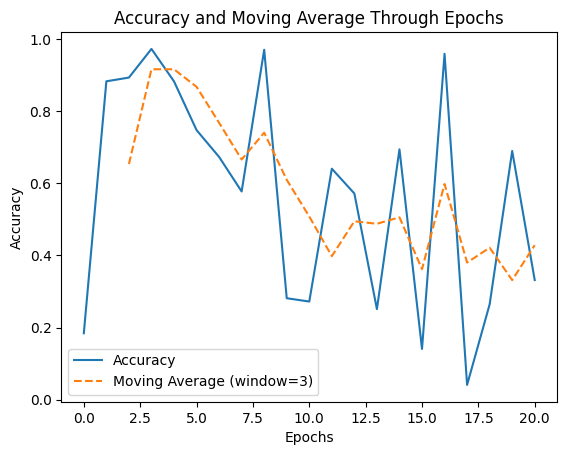

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
epochs = np.arange(21)  # Assuming 20 epochs
accuracy_values = np.random.rand(21)  # Replace with your actual accuracy values

# Function to compute moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Choose a window size for the moving average
window_size = 3

# Compute the moving average of accuracy
moving_avg_accuracy = moving_average(accuracy_values, window_size)
print(moving_avg_accuracy.shape)

# Plot the accuracy and moving average
plt.plot(epochs, accuracy_values, label='Accuracy')
plt.plot(epochs[window_size-1:], moving_avg_accuracy, label=f'Moving Average (window={window_size})', linestyle='--')

plt.title('Accuracy and Moving Average Through Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
